# Superflux onsets

This notebook demonstrates how to recover the Superflux onset detection algorithm of [Boeck and Widmer, 2013](http://dafx13.nuim.ie/papers/09.dafx2013_submission_12.pdf) from librosa.  This algorithm improves onset detection accuracy in the presence of vibrato.

In [1]:
from __future__ import print_function

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Audio

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [3]:
y, sr = librosa.load('audio/Karissa_Hobbs_-_09_-_Lets_Go_Fishin.mp3', sr=44100, duration=10, offset=20)

In [4]:
# Parameters from the paper:

n_fft = 1024
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3

In [5]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, fmin=fmin, fmax=fmax, n_mels=n_mels)

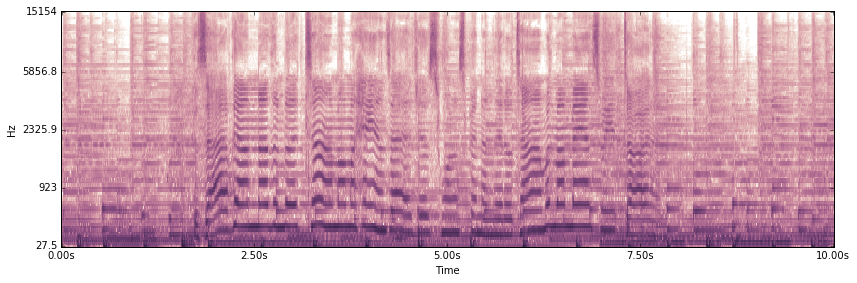

In [6]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.logamplitude(S, ref_power=np.max),
                         y_axis='mel', x_axis='time', sr=sr, hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.tight_layout()

In [7]:
odf_default = librosa.onset.onset_strength(y=y, sr=sr)
onset_default = librosa.onset.onset_detect(y=y, sr=sr)

In [8]:
odf_sf = librosa.onset.onset_strength(S=librosa.logamplitude(S), sr=sr, hop_length=hop_length,
                                      lag=lag, max_size=max_size)

onset_sf = librosa.onset.onset_detect(onset_envelope=odf_sf, sr=sr, hop_length=hop_length)

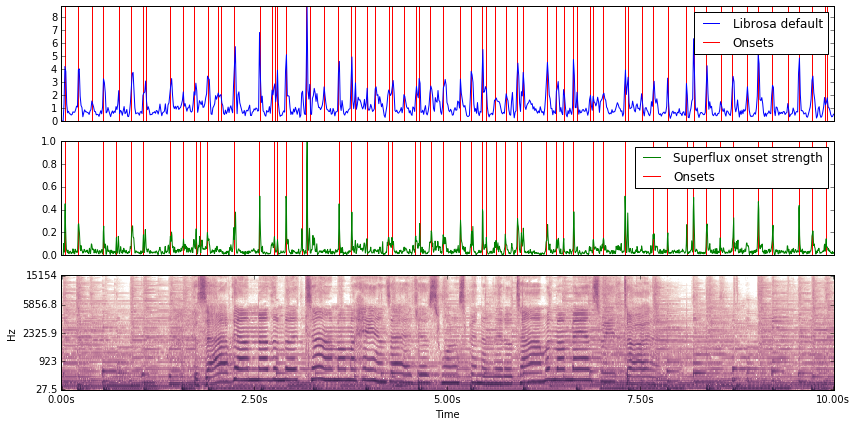

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(3,1,3)
librosa.display.specshow(librosa.logamplitude(S, ref_power=np.max),
                         y_axis='mel', x_axis='time', sr=sr, hop_length=hop_length, fmin=fmin, fmax=fmax)

plt.subplot(3,1,1)
plt.plot(odf_default, label='Librosa default')
plt.vlines(onset_default, 0, odf_default.max(), color='r', label='Onsets')
plt.xticks([])
plt.axis('tight')
plt.legend()


plt.subplot(3,1,2)
plt.plot(odf_sf, color='g', label='Superflux onset strength')
plt.vlines(onset_sf, 0, odf_sf.max(), color='r', label='Onsets')
plt.xticks([])
plt.legend()
plt.axis('tight')

plt.tight_layout()

In [10]:
# Librosa defaults
Audio(data=y + librosa.clicks(frames=onset_default, sr=sr, length=len(y)), rate=sr)

In [11]:
# Superflux
Audio(data=y + librosa.clicks(frames=onset_sf, sr=sr, hop_length=hop_length, length=len(y)), rate=sr)